In [1]:
import nengo
import nengo_spa as spa
import pytry
import numpy as np
from random import shuffle
import random
import sys, os
import math
from IPython import display
from scipy.optimize import brute, minimize
from scipy.stats import sem
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as style

import os

from itertools import product



# Import our classes
sys.path.append('..')
import experiments as xps
from experiments import create_xp
from model import ExperimentRun, create_vocab
from data import Data

# Optimization and model parameters

In [2]:
D = int(96)  # the dimensionality of the vectors
PROC_FDBCK = .9
PROC_FDBCK_SYN = .005
GW_FDBCK = 1
GW_SCALE = 20 # scale the input of GW for saturation and catching very short visual stimuli
BG_THR = .1
BG_BIAS = .5
STIM_DURATION = .029
FIX_DURATION = .5
N_NEURONS_SCALE = 1
N_NEURONS_SCALE_COMBINED = .25
INTEGRATOR_RESET = False
N_SAMPLES = 10000

N_BLOCKS_PER_OPERATION = 1 # default: 10
N_TRIALS_PER_DIGIT = 2 # default: 5
N_DIFFERENT_DIGITS = 4 # default: 4
N_DIFFERENT_OPERATIONS = 3 # default: 3

data_dir = "evaluate_fit/fit_no_threshold"


[ 5. 10. 15.]
[0.05 0.1  0.15 0.2  0.25]
condition  1 / 15 : (0, 0, 0)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.05
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 141.9851392168245
	 error rate: 0.3194444444444444
condition  12 / 15 : (0, 0, 1)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.1
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 139.3475372368455
	 error rate: 0.34375
condition  12 / 15 : (0, 0, 2)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.15000000000000002
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 132.65267317139256
	 error rate: 0.375
condition  12 / 15 : (0,

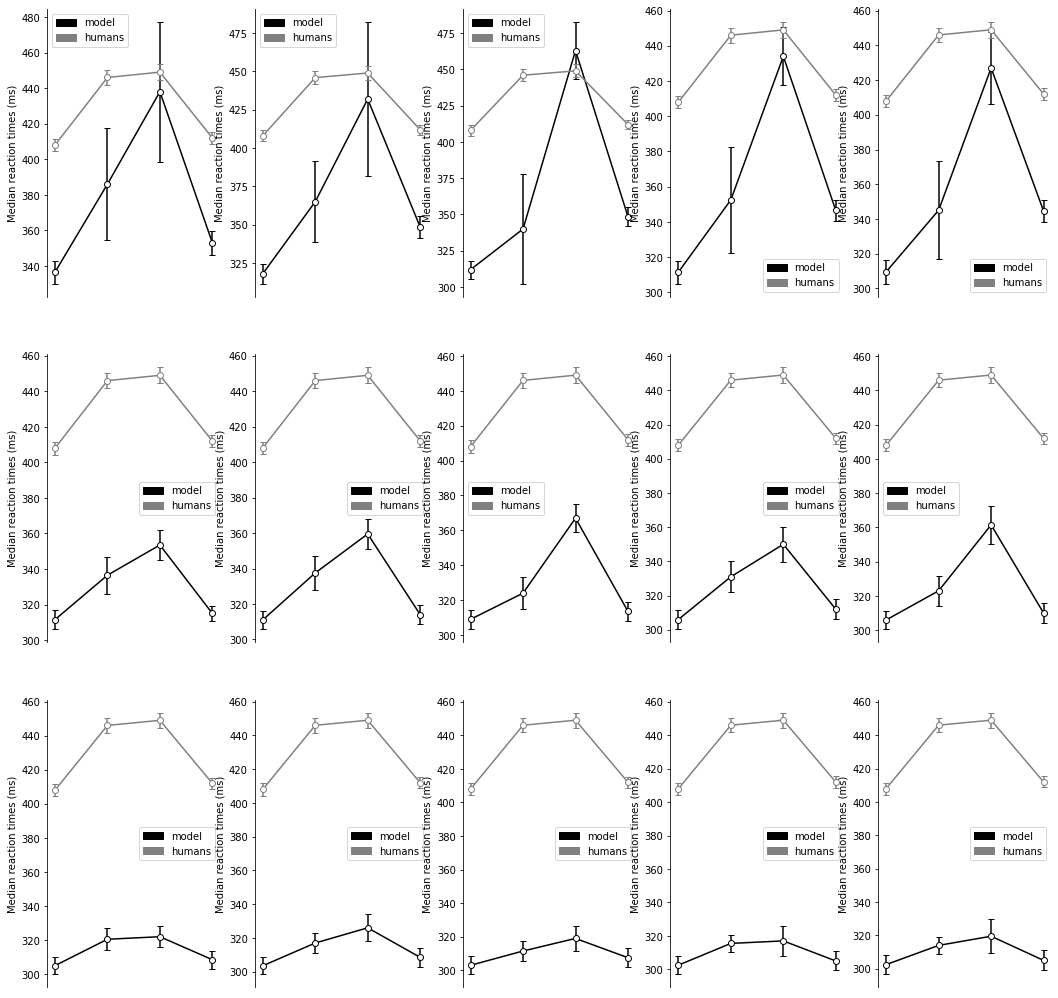

condition  1 / 15 : (0, 0, 0)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.05
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 141.9851392168245
	 error rate: 0.3194444444444444
condition  12 / 15 : (0, 0, 1)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.1
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 139.3475372368455
	 error rate: 0.34375
condition  12 / 15 : (0, 0, 2)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.15000000000000002
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 132.65267317139256
	 error rate: 0.375
condition  12 / 15 : (0, 0, 3)
	 sensory delay: 0
	 evidence stre

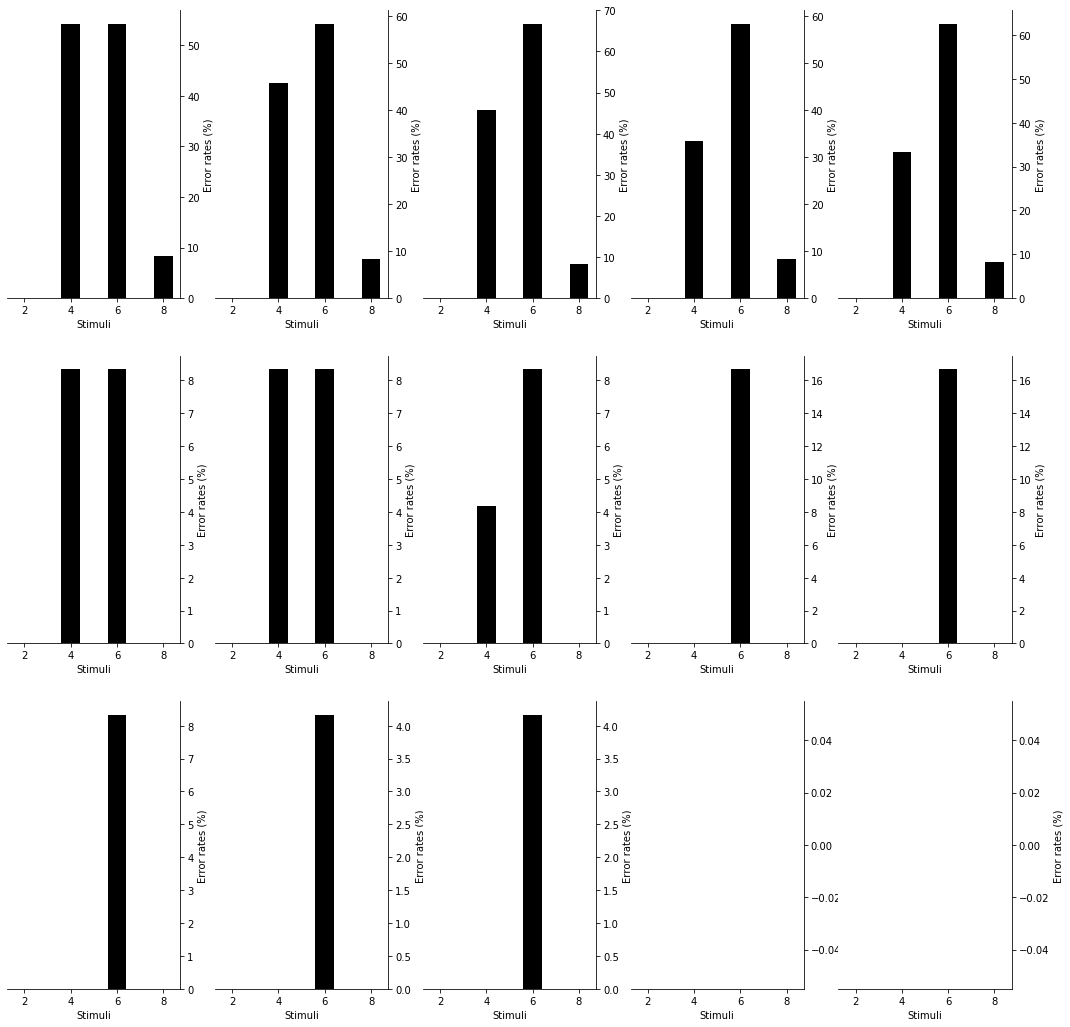

condition  1 / 15 : (0, 0, 0)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.05
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 141.9851392168245
	 error rate: 0.3194444444444444
condition  12 / 15 : (0, 0, 1)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.1
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 139.3475372368455
	 error rate: 0.34375
condition  12 / 15 : (0, 0, 2)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.15000000000000002
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 132.65267317139256
	 error rate: 0.375
condition  12 / 15 : (0, 0, 3)
	 sensory delay: 0
	 evidence stre

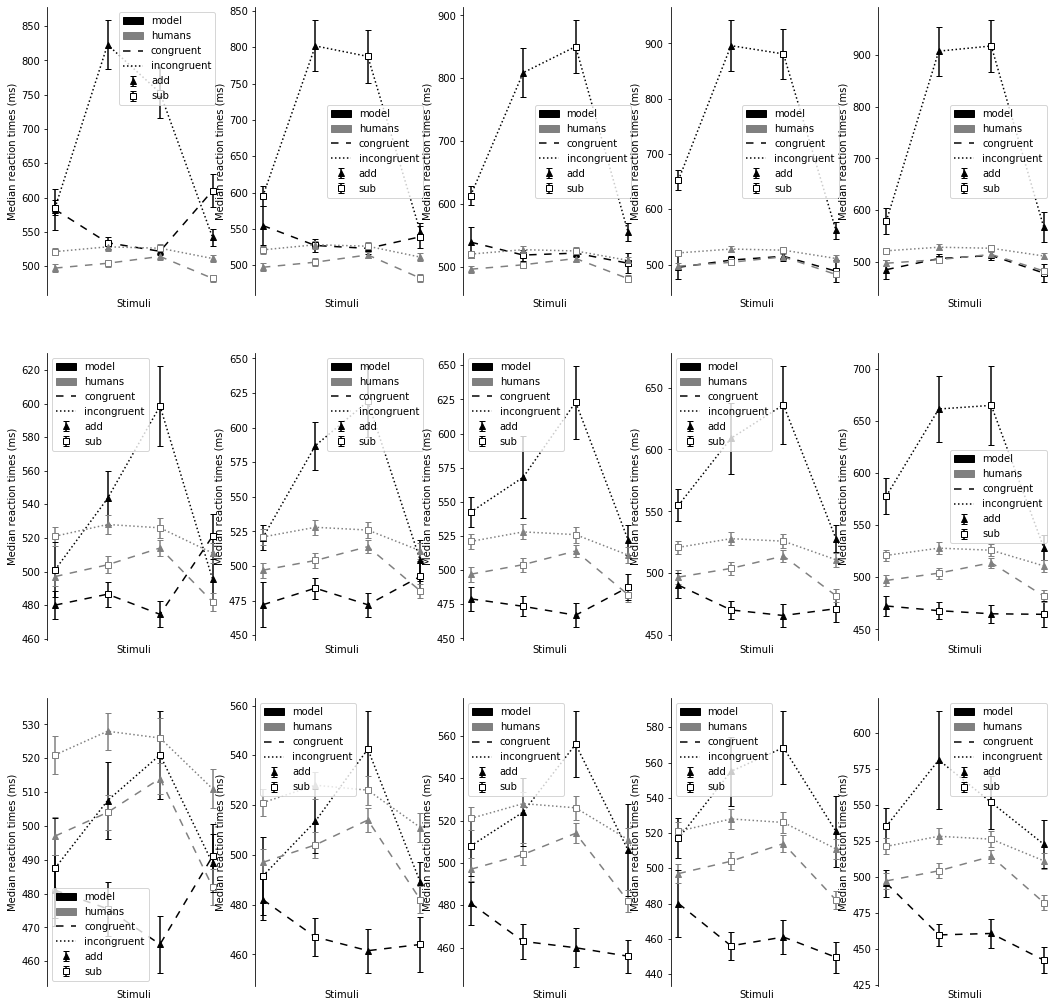

condition  1 / 15 : (0, 0, 0)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.05
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 141.9851392168245
	 error rate: 0.3194444444444444
condition  12 / 15 : (0, 0, 1)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.1
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 139.3475372368455
	 error rate: 0.34375
condition  12 / 15 : (0, 0, 2)
	 sensory delay: 0
	 evidence strength: 5.0
	 crosstalk: 0.15000000000000002
	 Simulating...
	 seed 1/12
	 seed 2/12
	 seed 3/12
	 seed 4/12
	 seed 5/12
	 seed 6/12
	 seed 7/12
	 seed 8/12
	 seed 9/12
	 seed 10/12
	 seed 11/12
	 seed 12/12
	 rmse: 132.65267317139256
	 error rate: 0.375
condition  12 / 15 : (0, 0, 3)
	 sensory delay: 0
	 evidence stre

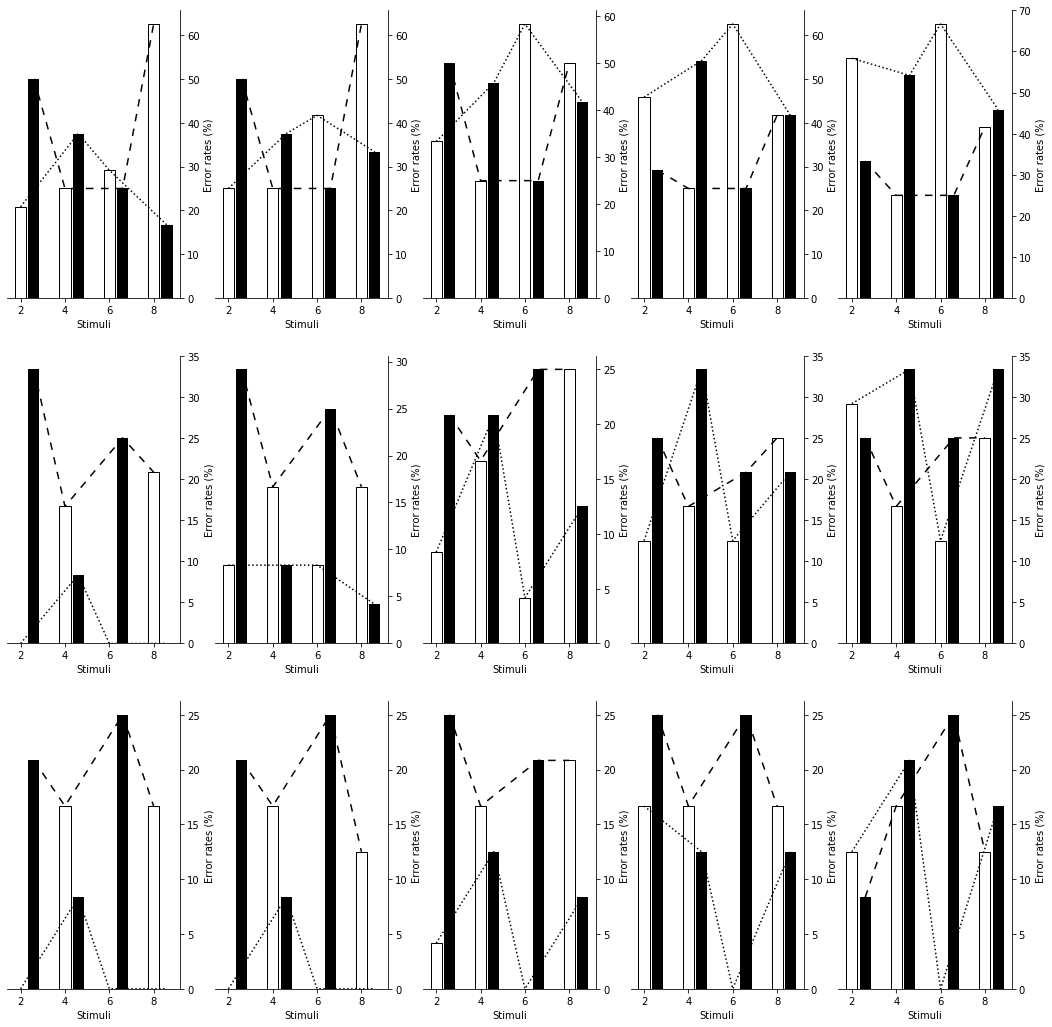

In [3]:
t_sensos = [0]#np.linspace(.05, .2, 5)
s_evids = np.linspace(5, 15, 3)
crosstalks = np.linspace(.05, .25, 5)
print(s_evids)
print(crosstalks)

STARTING_SEED = 1
N_SEEDS = 12

rmses = np.zeros((len(t_sensos), len(s_evids), len(crosstalks)))

for j in range(4):

    plt.figure(figsize=(18,18))

    i=0
    for condition in product(*tuple([range(len(param_values)) for param_values in [t_sensos, s_evids, crosstalks]])):
        i+=1
        print('condition ', i, '/', rmses.size, ':', condition)  
        print('\t sensory delay:', t_sensos[condition[0]]*1000)
        print('\t evidence strength:', s_evids[condition[1]])
        print('\t crosstalk:', crosstalks[condition[2]])
        data = []

        if True:

            print('\t Simulating...')
            for i,seed in enumerate(range(STARTING_SEED, STARTING_SEED+N_SEEDS)):
                print('\t seed '+str(i+1)+'/'+str(N_SEEDS))
                data_filename = 'run_seed'+str(seed)+'_sevid'+str(s_evids[condition[1]])+'_crosstalk'+str(crosstalks[condition[2]])         

                try:
                    seed_data = pd.read_pickle(data_dir+'/'+data_filename+'.csv')

                except FileNotFoundError:
                    xp = create_xp(N_BLOCKS_PER_OPERATION, N_TRIALS_PER_DIGIT, N_DIFFERENT_DIGITS, N_DIFFERENT_OPERATIONS, STIM_DURATION, FIX_DURATION, seed)
                    results = ExperimentRun().run(
                        n_neurons_scale=N_NEURONS_SCALE,
                        n_neurons_scale_combined=N_NEURONS_SCALE_COMBINED,
                        s_evidence=s_evids[condition[1]],
                        s_crosstalk=crosstalks[condition[2]],
                        n_samples=N_SAMPLES,
                        vocab=create_vocab(D, seed),
                        xp=xp,
                        integrator_reset=True,
                        proc_feedback=PROC_FDBCK,
                        proc_feedback_synapse=PROC_FDBCK_SYN,
                        GW_feedback=GW_FDBCK,
                        GW_scale=GW_SCALE,
                        BG_thr=BG_THR,
                        BG_bias=BG_BIAS,
                        seed=seed,
                        backend="nengo_ocl",
                        data_dir=data_dir,
                        data_filename=data_filename,
                        plt=False
                    )
                    seed_data = results['data'].df
                    seed_data.to_pickle(data_dir+'/'+data_filename+'.csv')

                data.append(seed_data)


            data = Data(pd.concat(data))
            data.df['rt'] += t_sensos[condition[0]]*1000 # add sensory delay to reaction times

            rmse_fitness_error = data.rmse_fitness_error(compare_errorrates=False, compare_RTs=True, tasks=range(N_DIFFERENT_OPERATIONS))
            print('\t rmse:', rmse_fitness_error[0])
            print('\t error rate:', data.error_rate)
            
            plt.subplot(len(s_evids), len(crosstalks), 1+len(crosstalks)*condition[1]+condition[2])
            if j==0:
                data.plot_fig2_simple(plot_humans=True, errorates=False, show=False)
            elif j==1:
                data.plot_fig2_simple(plot_humans=True, rts=False, show=False)
            if j==2:
                data.plot_fig2_chained(plot_humans=True, errorates=False, show=False)
            elif j==3:
                data.plot_fig2_chained(plot_humans=True, rts=False, show=False)

            rmses[condition] = rmse_fitness_error[0]
            
    plt.show()



